<a href="https://colab.research.google.com/github/Brandao20vtr/Projetos/blob/main/Analise_Exploratoria_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratíria 
## Dados - Vendas
Nesse mini projeto vamos fazer as previsões de vendas.

In [1]:
# Verificando a versão utilizada
from platform import python_version
print(f'Versão python usada nesse notebook: {python_version()}')

Versão python usada nesse notebook: 3.9.7


In [2]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as pn
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
# Carregando o dataset --> train.csv
sales_train_df = pd.read_csv('train.csv')

c:\Users\51050787\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Informações do dataset
print(f'Linhas: {sales_train_df.shape[0]}')
print(f'Colunas: {sales_train_df.shape[1]}')

Linhas: 1017209
Colunas: 9


In [5]:
# Primeiros registros
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# Analisando valores
Quantos valores únicos possui.

In [6]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [7]:
sales_train_df['Promo'].unique()

array([1, 0], dtype=int64)

In [8]:
sales_train_df['Open'].unique()

array([1, 0], dtype=int64)

In [9]:
sales_train_df['StateHoliday'].unique()

# 0 --> Identifica que não houve feriado
# a --> É um feriado público
# b --> É páscoa
# c --> É natal

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [10]:
sales_train_df['SchoolHoliday'].unique()

# 1 --> É feriado escolar
# 0 --> Não é feriado escolar

array([1, 0], dtype=int64)

In [11]:
# Últimos valores
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [12]:
# Informações
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
# Valores estatísticos
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


## Dados - Lojas

In [14]:
# Lendo arquivo
store_info_df = pd.read_csv('store.csv')

In [15]:
store_info_df.shape

(1115, 10)

In [16]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [18]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [19]:
store_info_df.isnull()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1110,False,False,False,False,False,False,False,False,False,False
1111,False,False,False,False,False,False,False,True,True,True
1112,False,False,False,False,True,True,False,True,True,True
1113,False,False,False,False,True,True,False,True,True,True


# Exploração Dados - Vendas

In [20]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

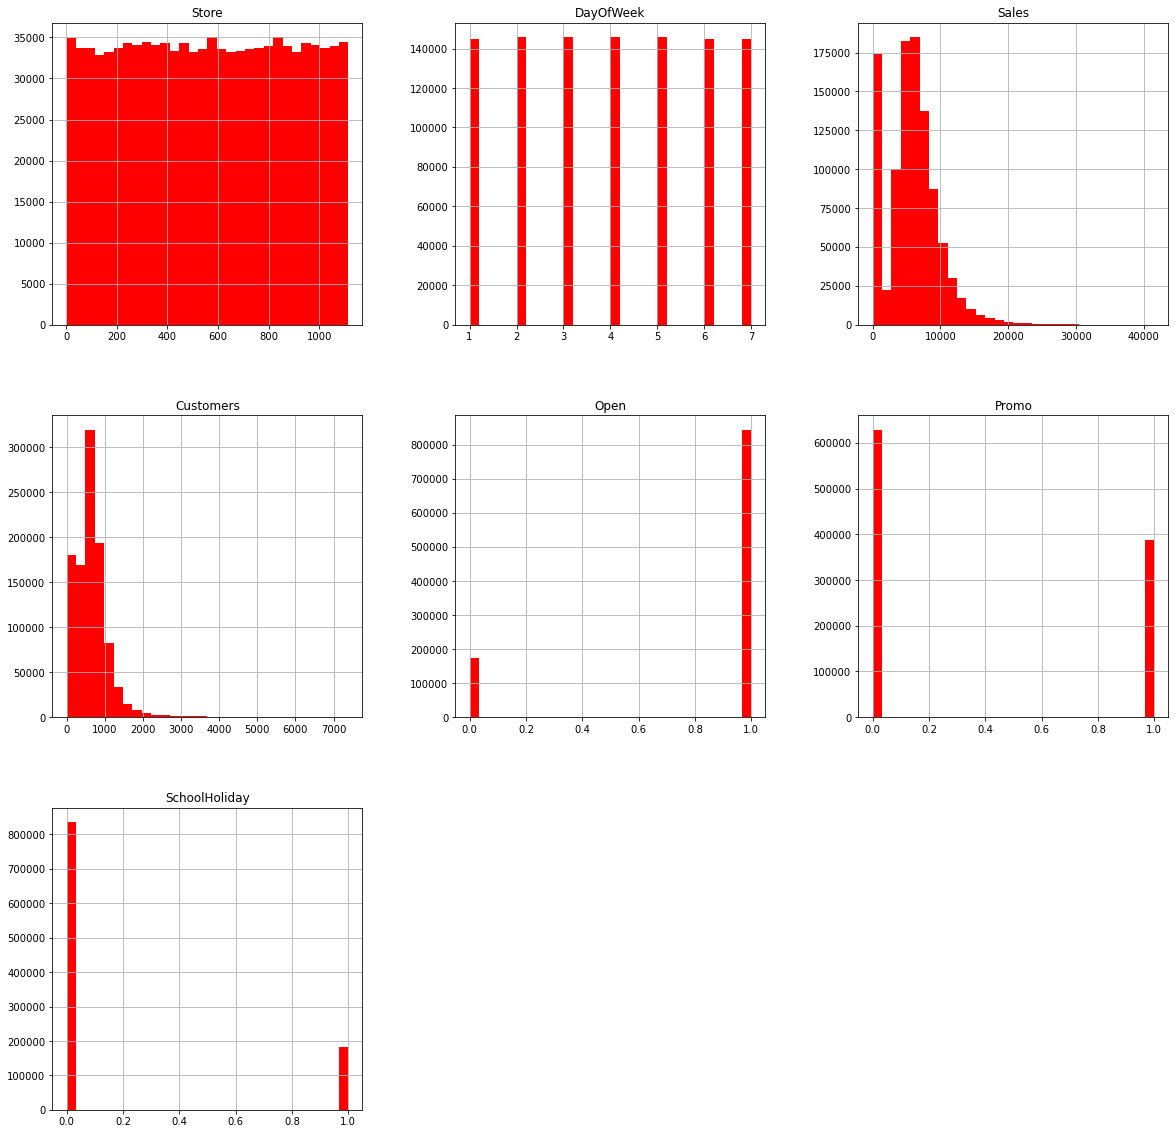

In [21]:
# Histograma para entender melhor a distribuição dos dados
sales_train_df.hist(bins=30, figsize=(20,20), color='r')

# bins --> Némeros de faixas que estarão no histograma

In [22]:
# Máximo de clientes em um dia
sales_train_df['Customers'].max()

7388

In [23]:
# Histograma para quando as lojas estão FECHADAS e ABERTAS
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1 ]

In [24]:
print(f'Total: {len(sales_train_df)}')
print(f'Número de lojas/dias fechado: {len(closed_train_df)}')
print(f'Número de lojas/dias aberto: {len(open_train_df)}')

Total: 1017209
Número de lojas/dias fechado: 172817
Número de lojas/dias aberto: 844392


In [25]:
# Dividindo o valor total de dias fechado pela quantidade de lojas
172817 / len(store_info_df)

# Total de 154 dias que as lojas estavam fechadas

154.99282511210762

In [26]:
closed_train_df.head()

# Como esses dias estavam fechados, não vale a pena usar esses valores
# porque eles são ZERO pode dar diferença em algum outro cálculo

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [27]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [28]:
sales_train_df.shape

(844392, 9)

In [29]:
sales_train_df

# Com esses valores podemos trabalhar poque possui valores
# Como já não precisamos mais da coluna OPEN, vamos apagá-la

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [30]:
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [31]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


# Dados das lojas

<AxesSubplot:>

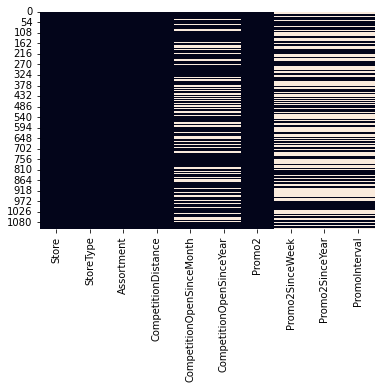

In [32]:
# Virificando valores nulos
# cbar=False --> Retira a barra que fica ao lado
sns.heatmap(store_info_df.isnull(), cbar=False)

In [33]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

# Possui valores nulos nessa coluna e precisamos tratá-los

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [34]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

# Aqui encontramos vários valores nulos

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [35]:
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

# Aqui também encontramos vários valores nulos

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [36]:
# Identificando as lojas que não estão participando da promoção
# 1 --> Está participando
# 0 --> Não está participando
store_info_df[store_info_df['Promo2'] == 0]

# Encontramos valores nulos nas últimas colunas, isso porque se a loja não 
# participou da promoção não tem porque ter esses valores, porém como precisaremos
# desses valore para análise e não tem como subtrair ou somar datas
# vamos colocar ZERO onde está nulo

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [37]:
# Selecionando as colunas a serem preenchidas
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

# Vai preencher com (0) onde for nulo
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)

<AxesSubplot:>

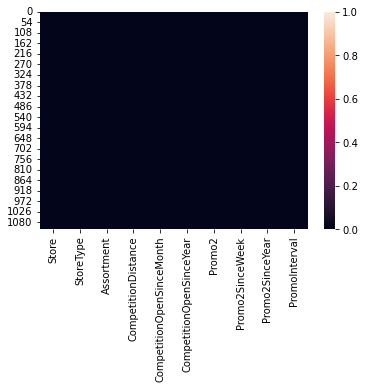

In [38]:
# Agora não temos os valores nulos das colunas que preenchemos
sns.heatmap(store_info_df.isnull())

# Para 'CompetitionDistance' podemos preencher os valores que estão
# faltando utilizando a mádia

In [39]:
# Preenchendo com a média
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

<AxesSubplot:>

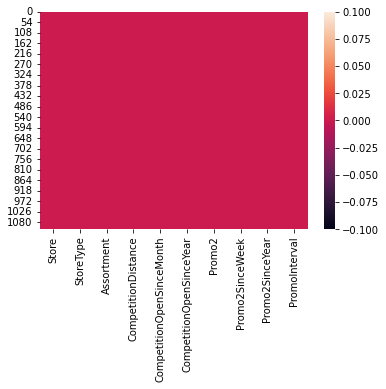

In [40]:
# Agora não possuimos mais valores nulos
sns.heatmap(store_info_df.isnull())

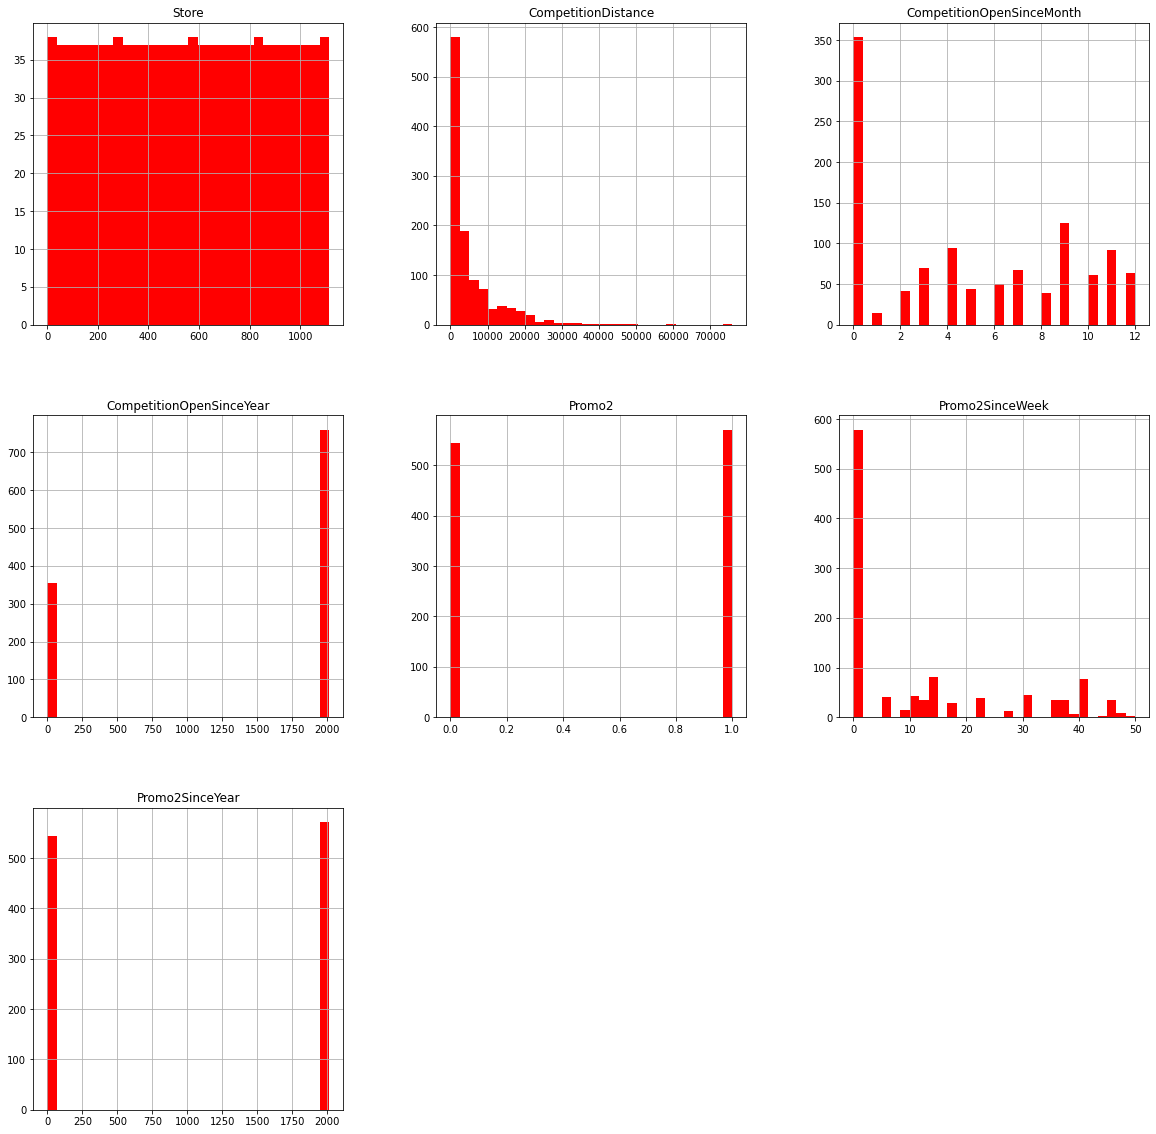

In [41]:
# Geral um histograma para verificar a distribuição dos dados
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r');

In [42]:
store_info_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


## Dados Unidos (Vendas + Lojas)

In [43]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [44]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [45]:
# 'merge' --> Une as tabelas como o JOIN no SQL
# how = 'inner' --> Tipo de relacionamento 
# on = 'Store' --> Qual parte da tabela vai conectar (Que liga uma tabela a outra)
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [46]:
print(f'Linhas: {sales_train_all_df.shape[0]}')
print(f'Colunas: {sales_train_all_df.shape[1]}')

Linhas: 844392
Colunas: 17


In [47]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


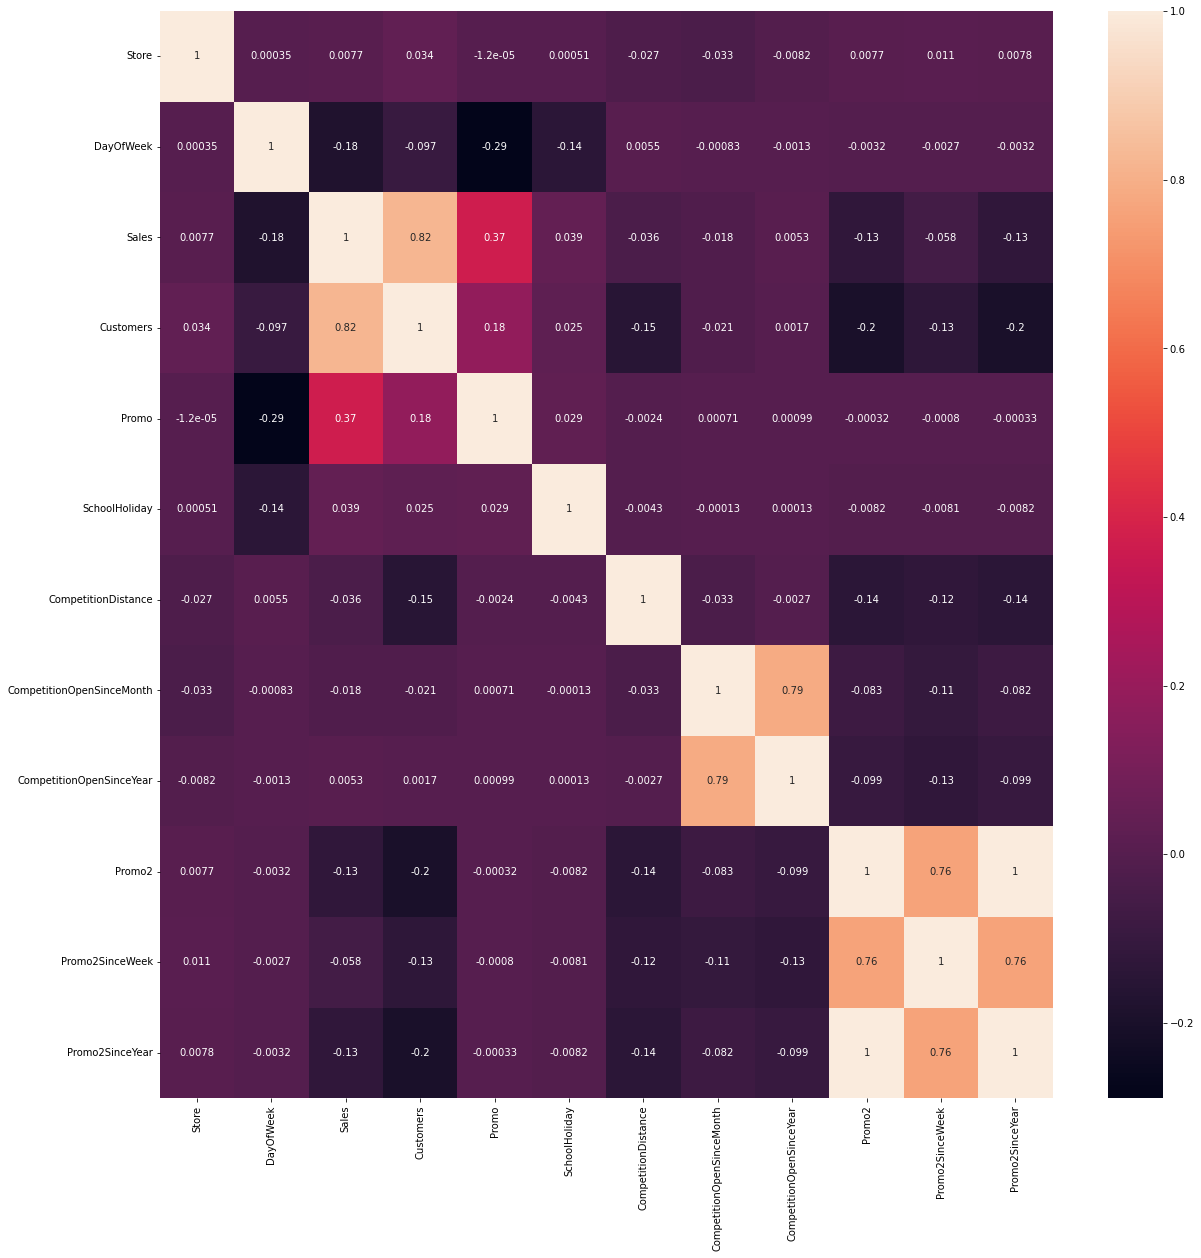

In [48]:
# Gerando uma matriz de correlação
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot = True);   # Essa pontuação no final é para não retornar uma linha de texto em cima do gráfico

In [49]:
# Esse 'Sales' aqui na frente é para quando queremos fazer uma correlação de um atributo específico
correlations = sales_train_all_df.corr()['Sales'].sort_values()  
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [50]:
# Para visualizarmos alguns gráficos vamos dividir a coluna DATE em Dia
# separar em Mês e separar em Ano

# Aqui iremos separar por Ano
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [51]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


In [52]:
# Aqui iremos separar por Mês
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month

# Aqui iremos separar por Dia
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [53]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Média de vendas por mês')

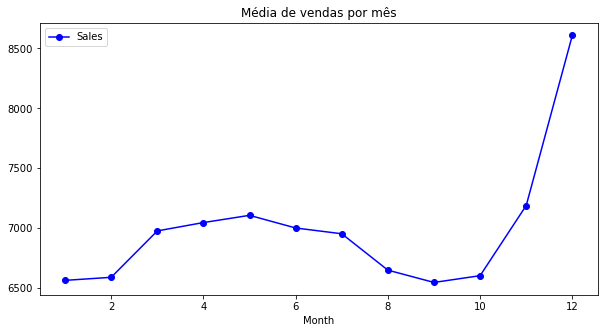

In [54]:
# Gerando um gráfico com a média de venda agrupado pela venda
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize=(10, 5), marker = 'o', color = 'b')
axis.set_title('Média de vendas por mês')

# Aqui mostra que nos meses de Novembro e Dezembro houve um aumento muito grande na média de vendas
# isso porque em Novembro temos a Black Friday e em Dezembro temos o Natal, períodos onde as pessoas
# compram muito, com isso a loja pode se programar para esses momentos e aumentar o estoque ou 
# fazer algumas promoções para aumentar ainda mais a venda

Text(0.5, 1.0, 'Média de clientes por mês')

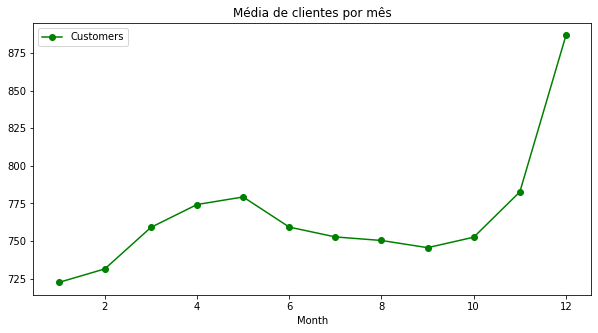

In [55]:
# Gerando um gráfico agrupado pelos clientes
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize=(10, 5), marker = 'o', color = 'g')
axis.set_title('Média de clientes por mês')

# É bem parecido com o gráfico anterior, aqui mostra que os clientes mais compram em Novembro e Dezembro

Text(0.5, 1.0, 'Média de vendas por dia')

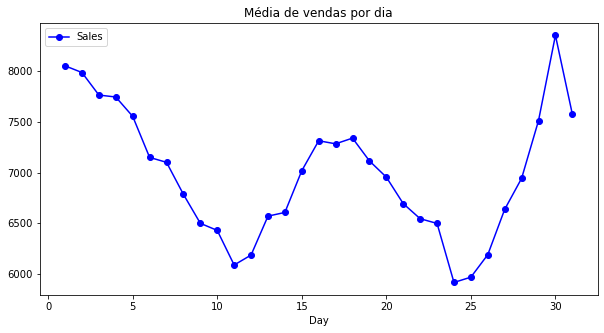

In [56]:
# Gerando um gráfico agrupando por dia
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize=(10, 5), marker = 'o', color = 'b')
axis.set_title('Média de vendas por dia')

# Podemos observar que a loja mais venda a partir do dia 25, tem o maior
# pico de vendas entre os  dias 29, 30, 31 e 1

Text(0.5, 1.0, 'Média de clientes por dia')

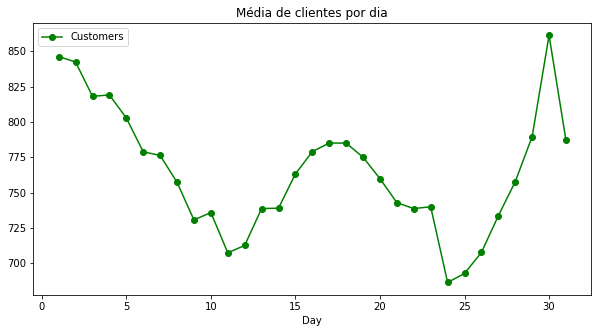

In [57]:
# Gerando um gráfico agrupando por dia
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize=(10, 5), marker = 'o', color = 'g')
axis.set_title('Média de clientes por dia')

# Assim como no gráfico acima podemos ver que os clientes mais compram no final do mês

Text(0.5, 1.0, 'Média de vendas por dia da semana')

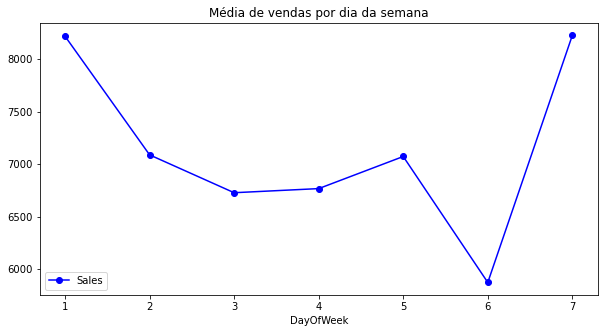

In [58]:
# Gerando um gráfico agrupando por dia
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10, 5), marker = 'o', color = 'b')
axis.set_title('Média de vendas por dia da semana')

# Vemos que as vendas são mais altas no fim de semana

Text(0.5, 1.0, 'Média de clientes por dia da semana')

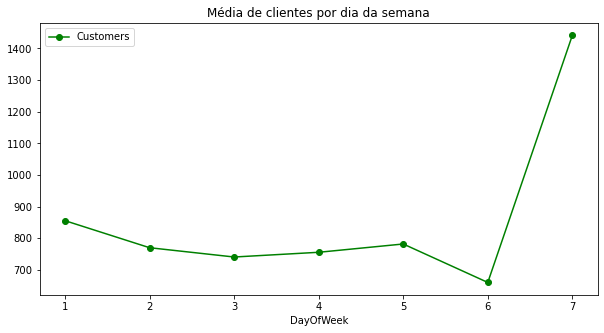

In [59]:
# Gerando um gráfico agrupando por dia
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10, 5), marker = 'o', color = 'g')
axis.set_title('Média de clientes por dia da semana')

# Vemos que os clientes mais compra no sábado

<AxesSubplot:xlabel='Date'>

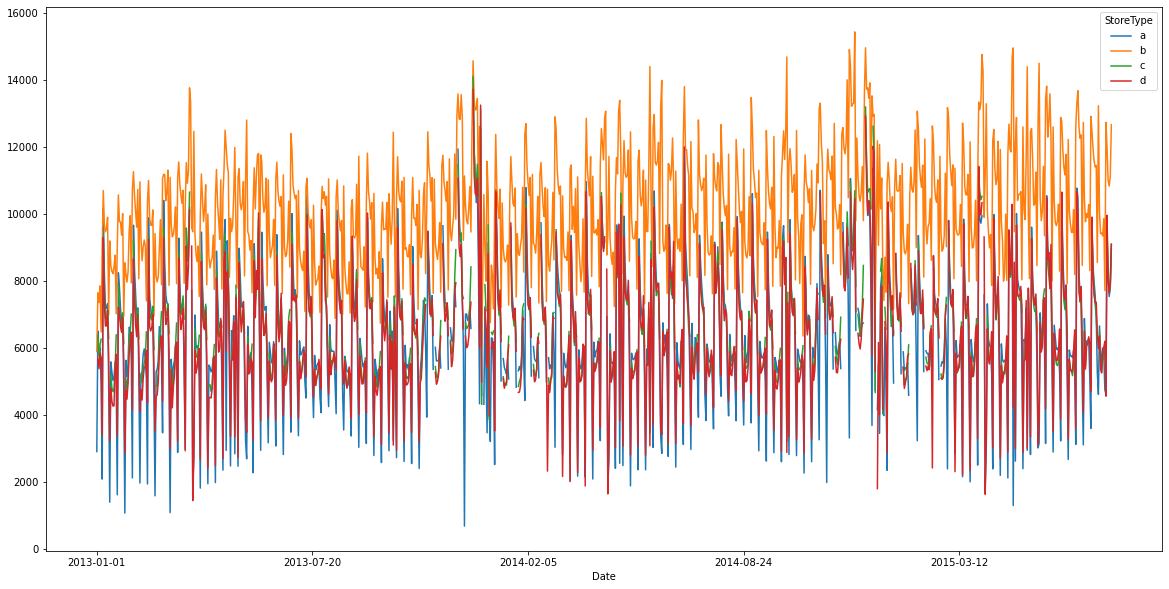

In [62]:
# Fazendo agrupamento por mais atributos
# Verificar se existe algum padrão no tipo de loja

# .unstack() --> Faz uma divisão nos dados (separar os dados no tipo da loja)
fig, ax = plt.subplots(figsize=(20, 10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

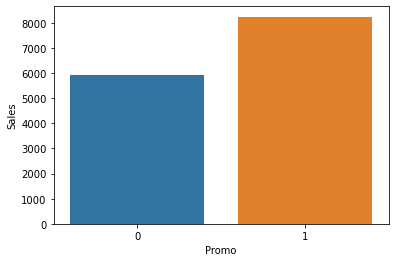

In [63]:
# Se a promoção afeta o número de vendas na loja
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

# Quando temos promoção nas lojas aumenta as vndas

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

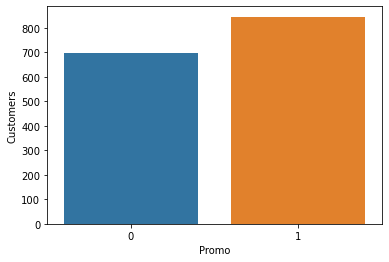

In [64]:
# Se a promoção afeta o número de clientes na loja
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

# Quando tem promoção, o número de clientes é maior